![](../7daysofcode.png)

---

Por *Kalel Leonardo Martinho*

# #7DaysOfCode - 2: Data Visualization & Storytelling 💻

Investigar os dados CEAPs e gerar visualizações para identificar padrões estranhos ou estatísticas interessantes.

---

Vamos trabalhar com os dados tratados na primeira parte do desafio.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import matplotlib.patches as mpatches
import seaborn as sns
from millify import millify


df = pd.read_csv('CEAPS_dados_2010_2022.csv', sep=';', index_col=[0], parse_dates=[5])
df_2022 = df[df['DATA'].dt.year == 2022]

sns.set_theme(context='notebook', style="darkgrid", palette='deep', font_scale=1, color_codes=True, rc=None)

In [16]:
def add_value_labels(ax, spacing=5, bar='h'):
    for rect in ax.patches:
        if bar == 'h':
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
        elif bar == 'v':
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
        space = spacing
        if bar == 'h':
            va = 'bottom'
            if y_value < 0:
                space *= -1
                va = 'top'
            label = millify(y_value, precision=2)

            ax.annotate(
                label,                      
                (x_value, y_value),         
                xytext=(0, space),          
                textcoords="offset points", 
                ha='center',                
                va=va)                      
                                            
        elif bar == 'v':
            ha = 'left'
            
            if x_value < 0:
                space *= -1
                va = 'top'
            label = millify(x_value, precision=2)
            
            ax.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords='offset points',
                ha=ha,
                va='center')


---

# Explorando os dados



In [265]:
df.head()

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,CENTRAIS ELÉTRICAS DE RONDÔNIA,2010-01-01,"Aluguel de imóveis para escritório político, c...",59.08
1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,CENTRAIS ELÉTRICAS DE RONDônia,2010-01-01,"Aluguel de imóveis para escritório político, c...",40.47
2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,2010-01-01,"Aluguel de imóveis para escritório político, c...",5000.00
3,ACIR GURGACZ,Divulgação da atividade parlamentar,09.040.457/0001-02,CENTRAL RONDÔNIA.COM,2010-01-01,Divulgação da atividade parlamentar,1500.00
4,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",15.896.509/0001-31,POSTO FORTALEZA,2010-01-01,"Locomoção, hospedagem, alimentação, combustíve...",30.00


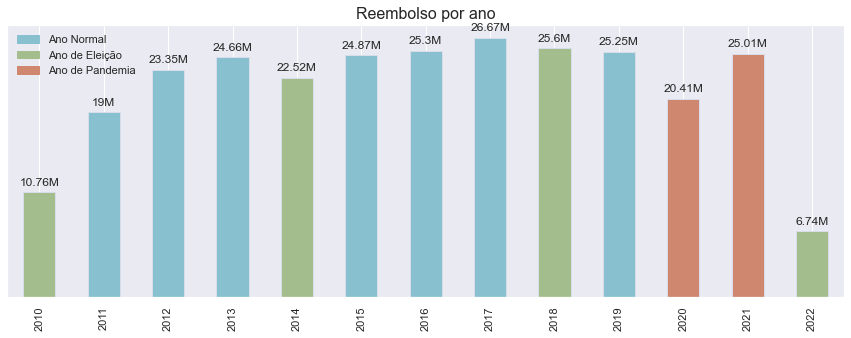

In [18]:
plt.figure(figsize=(15,5))
reembolso_ano = df.groupby(df['DATA'].dt.year).VALOR_REEMBOLSADO.sum()
colors = ['#A3BE8C', '#88C0D0', '#88C0D0', '#88C0D0', '#A3BE8C',
          '#88C0D0', '#88C0D0', '#88C0D0', '#A3BE8C', '#88C0D0', '#D08770', '#D08770',
          '#A3BE8C']
ax = reembolso_ano.plot(kind = 'bar', edgecolor='#D8DEE9', color=colors)
ax.set_title('Reembolso por ano', fontsize=16)
ano_normal = mpatches.Patch(color='#88C0D0', label='Ano Normal')
ano_eleicao = mpatches.Patch(color='#A3BE8C', label='Ano de Eleição')
ano_pandemia = mpatches.Patch(color='#D08770', label='Ano de Pandemia')

ax.legend(handles=[ano_normal, ano_eleicao, ano_pandemia], frameon=False, loc=2)
ax.set(xlabel = None)
ax.axes.get_yaxis().set_visible(False)
add_value_labels(ax)

In [12]:
total_reembolso = df['VALOR_REEMBOLSADO'].sum()
total_reembolso = str(millify(total_reembolso, precision=2))
print(f'Reembolso 2010-2022 TOTAL: R${total_reembolso}')

Reembolso 2010-2022 TOTAL: R$280.16M


In [360]:
maiores_reembolsos = df.groupby('SENADOR').sum().sort_values(by='VALOR_REEMBOLSADO', ascending=False).head()

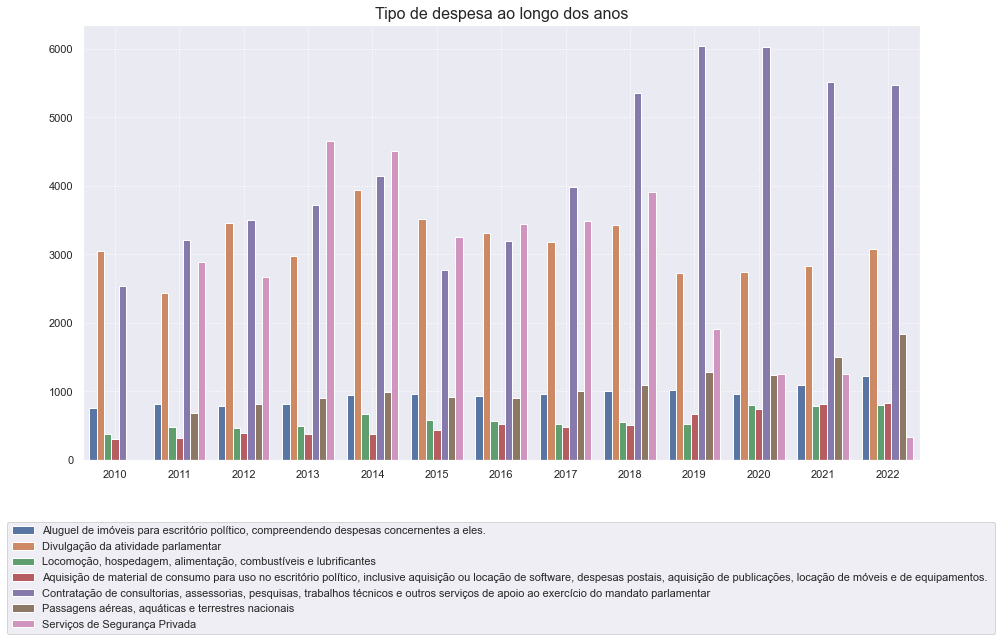

In [264]:
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=df['DATA'].dt.year, y="VALOR_REEMBOLSADO", hue="TIPO_DESPESA", data=df, ci=None)
ax.set(xlabel = None, ylabel = None)
ax.set_title('Tipo de despesa ao longo dos anos', fontsize=16)
plt.grid(ls=':')
plt.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)
plt.show()

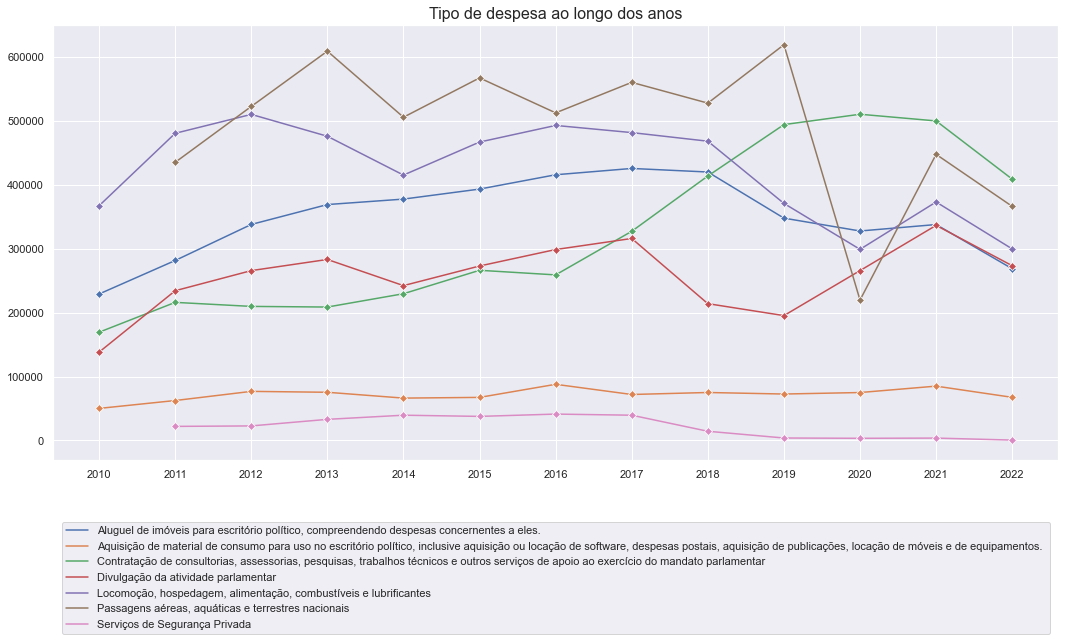

In [263]:
ds = df.groupby(['TIPO_DESPESA', 'DATA'], as_index=False)['VALOR_REEMBOLSADO'].sum() 
plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=ds, x=ds['DATA'].dt.year, y='VALOR_REEMBOLSADO', hue='TIPO_DESPESA', marker='D', ci=None)
ax.legend(bbox_to_anchor=(0.5, -0.4), loc='lower center', borderaxespad=0)
ax.ticklabel_format(axis='y', style='plain')
x = np.arange(ds['DATA'].dt.year.min(), ds['DATA'].dt.year.max()+1, 1)
ax.set_xticks(x)
ax.grid(True)
ax.set(xlabel = None, ylabel = None)
ax.set_title("Tipo de despesa ao longo dos anos", fontsize=16)
plt.show()

---

### MAIORES REEMBOLSOS

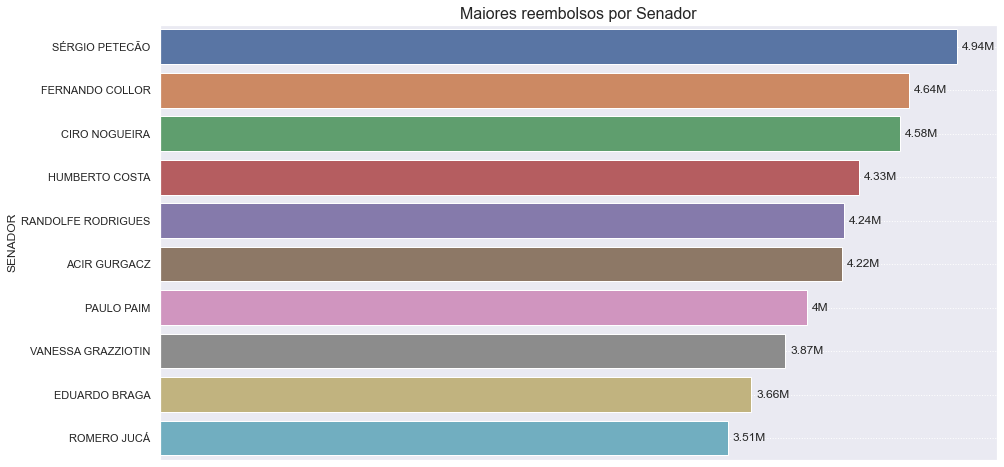

In [105]:
plt.figure(figsize=(15, 8))

top_reembolso = df.groupby('SENADOR').VALOR_REEMBOLSADO.sum().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False ).head(10)
ax = sns.barplot(y='SENADOR',
            x='VALOR_REEMBOLSADO', orient='h', data=top_reembolso, ci=None)
ax.set(xlabel = None)
ax.set(ylabel = 'SENADOR')
ax.axes.get_xaxis().set_visible(False)
ax.set_title("Maiores reembolsos por Senador", fontsize=16)
add_value_labels(ax, bar = 'v')
plt.grid(ls=':')
plt.show()

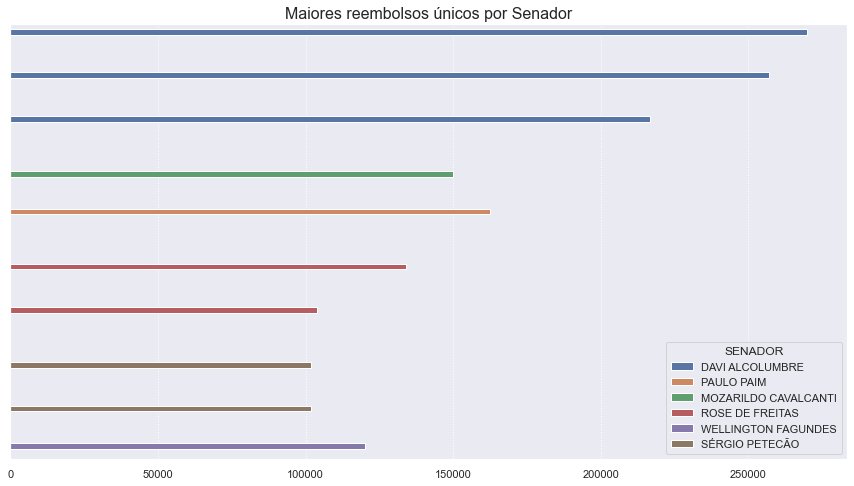

In [218]:
plt.figure(figsize=(15, 8))

top_reembolso = df.groupby('SENADOR').VALOR_REEMBOLSADO.nlargest().reset_index().sort_values(by='VALOR_REEMBOLSADO', ascending=False ).head(10)
ax = sns.barplot(y=top_reembolso.index,
            x='VALOR_REEMBOLSADO', orient='h', data=top_reembolso, ci=None, hue='SENADOR')
ax.set(xlabel = None, ylabel = None)
ax.axes.get_yaxis().set_visible(False)
ax.set_title("Maiores reembolsos únicos por Senador", fontsize=16)
plt.grid(ls=':')
plt.show()

---